# Requirements

In [1]:
import os
import ffmpeg
import string
from spleeter.separator import Separator

# Set input folder and desire encode for result

In [2]:
AUDIOS_URL = 'audio_files'
encoder = 'mp3'
songs = os.listdir(AUDIOS_URL)

# check the audio files to separate:

#### (sometimes the title has unallowed characters, be careful)

In [3]:
os.listdir(AUDIOS_URL)

['Can_she_excuse_my_wrongs_-_John_Dowland_(1563-1626)_-_Mnestrel.mp3',
 'Che_si_pu_fare_-_Barbara_Strozzi_(16191677)_-_Mnestrel.mp3']

### Let's do one song

In [4]:
song_dir = os.path.join(AUDIOS_URL,songs[0])
song_dir

'audio_files\\Can_she_excuse_my_wrongs_-_John_Dowland_(1563-1626)_-_Mnestrel.mp3'

# Separate one song

### the function

In [5]:
def separate_voice(audio_file, encoder, stems = 2):
    separator = Separator(f"spleeter:{stems}stems")
    separator.separate_to_file(audio_file,
                           'data/temp',
                           codec=encoder,
                           filename_format='{filename}/{instrument}.{codec}')

In [6]:
separate_voice(song_dir, encoder)

INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models\\2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
INFO:tensorflow:Calling model_fn.
INFO:tensorfl

### This will create a folder named as the song

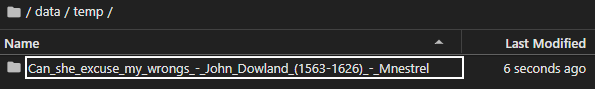

### And inside the files of the separated music and voice:

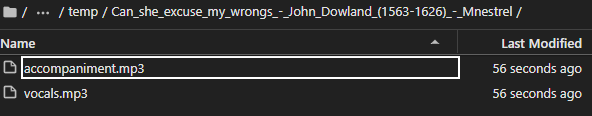

### So the process is ready.

### But lets clean everything by changing the names of the results and put them in their own folders

In [7]:
def clean_folders(audio_file, encoder):
    voice = f'data/temp/{audio_file[:-4]}/vocals.{encoder}'
    music = f'data/temp/{audio_file[:-4]}/accompaniment.{encoder}'
    os.rename(voice, f'data/voices/{audio_file[:-4]}_vocals.{encoder}')
    os.rename(music, f'data/music/{audio_file[:-4]}_music.{encoder}')
    os.rmdir(f'data/temp/{audio_file[:-4]}')

### To clean we need the name of the song without the directory:

In [10]:
songs[0]

'Can_she_excuse_my_wrongs_-_John_Dowland_(1563-1626)_-_Mnestrel.mp3'

In [11]:
clean_folders(songs[0], encoder)

## Now the temp folder is clean, and the voice and music are in their respective places

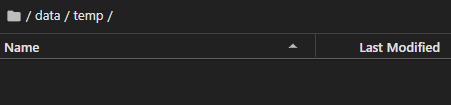

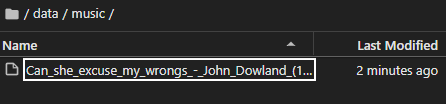

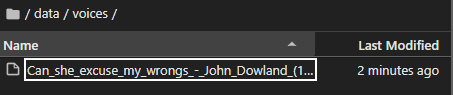

# Now let's erase the input files:

In [12]:
def clean_audio_files():
    for file in os.listdir(AUDIOS_URL):
            os.remove(os.path.join(AUDIOS_URL,file))

In [13]:
clean_audio_files()

## Now the folder with the inputs is empty:

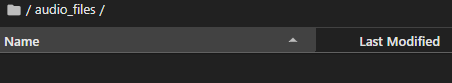

# And that's all enjoy your musicless voices and voiceless music